<a href="https://colab.research.google.com/github/ahmed-tbe/bilayer-graphene/blob/main/charge_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

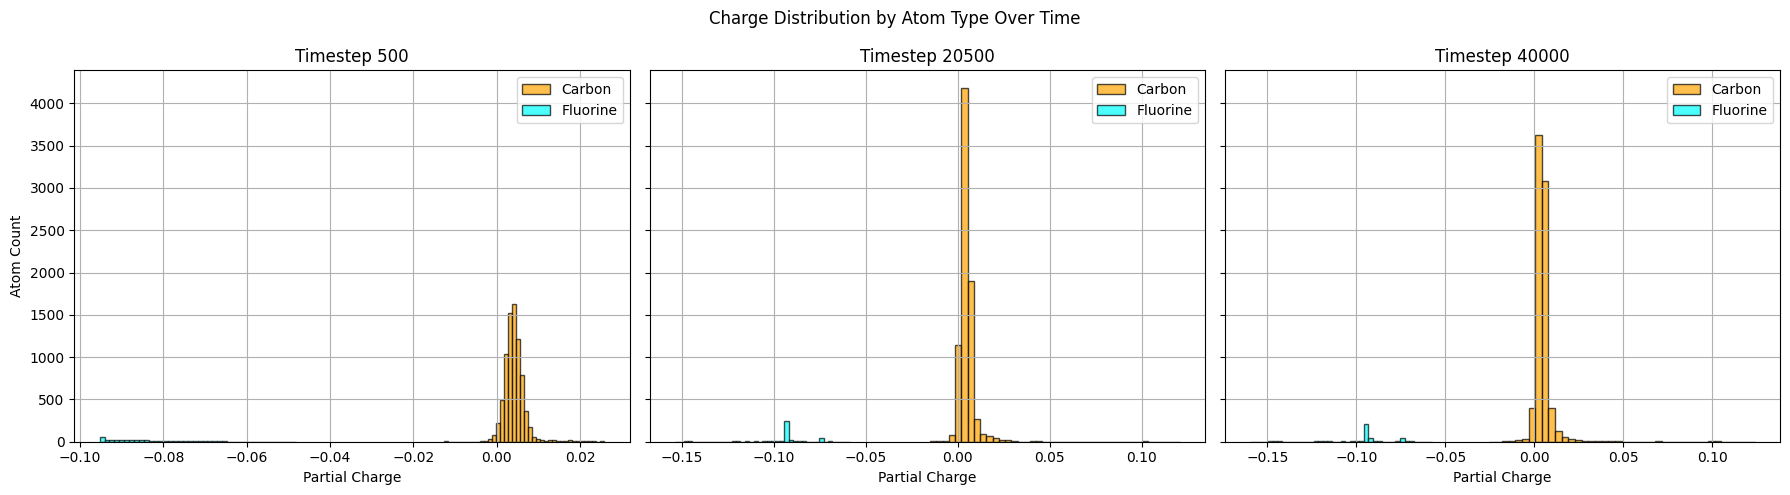

In [ ]:
import matplotlib.pyplot as plt

# ======= PARSE FILE AND ORGANIZE BY TYPE =======
timestep_data = {}
current_timestep = None
reading_atoms = False
header_fields = []
charge_col, type_col = None, None

with open("dump.lammpstrj", "r") as f:
    for line in f:
        if "ITEM: TIMESTEP" in line:
            current_timestep = int(next(f).strip())
            timestep_data[current_timestep] = []
            reading_atoms = False
        elif "ITEM: ATOMS" in line:
            header_fields = line.strip().split()[2:]
            charge_col = header_fields.index("q")
            type_col = header_fields.index("type")
            reading_atoms = True
        elif "ITEM:" in line:
            reading_atoms = False
        elif reading_atoms:
            timestep_data[current_timestep].append(line.strip().split())

# ======= SELECT TIMESTEPS =======
timesteps = sorted(timestep_data.keys())
early_ts = timesteps[0]
mid_ts = timesteps[len(timesteps)//2]
final_ts = timesteps[-1]
timesteps_of_interest = [early_ts, mid_ts, final_ts]

# ======= GROUP CHARGES BY TYPE =======
charges_split = {}  # {timestep: {'C': [], 'F': []}}

for ts in timesteps_of_interest:
    carbon_charges = []
    fluorine_charges = []
    for atom in timestep_data[ts]:
        atom_type = int(atom[type_col])
        charge = float(atom[charge_col])
        if atom_type == 1:  # Assume type 1 = Carbon
            carbon_charges.append(charge)
        elif atom_type == 2:  # Assume type 2 = Fluorine
            fluorine_charges.append(charge)
    charges_split[ts] = {
        "C": carbon_charges,
        "F": fluorine_charges
    }

# ======= PLOT =======
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, ts in enumerate(timesteps_of_interest):
    axs[i].hist(charges_split[ts]["C"], bins=40, alpha=0.7, label="Carbon", color="orange", edgecolor="black")
    axs[i].hist(charges_split[ts]["F"], bins=40, alpha=0.7, label="Fluorine", color="cyan", edgecolor="black")
    axs[i].set_title(f"Timestep {ts}")
    axs[i].set_xlabel("Partial Charge")
    axs[i].grid(True)
    if i == 0:
        axs[i].set_ylabel("Atom Count")
    axs[i].legend()

plt.suptitle("Charge Distribution by Atom Type Over Time")
plt.tight_layout()
plt.show()